In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensor_utils as utils

np.random.seed(14159)
plt.style.use('default')
plt.rcParams["text.usetex"] = True

In [2]:
# Set parameters
c = np.array([0.1, 0.2, 0.7])
eps_r = np.linspace(0.01, 1, 100)
sigma_r = np.tile(np.linspace(0.1, 5, 200), (eps_r.size, 1))*eps_r[:, None]
N = 200

d = c.size
ct = (N**(d-2))*np.prod(c[:-1])/c[-1]
setting = "$\\mathbf{{c}} = {{{}}}^\\top$".format(list(np.round(c, 2)))

beta_r = np.empty_like(sigma_r)*np.nan
align_r = np.empty((*sigma_r.shape, c.size))*np.nan
beta_pht = np.empty_like(eps_r)*np.nan
align_pht = np.empty((eps_r.size, d))*np.nan
kernel_pht = np.empty_like(eps_r)*np.nan

In [3]:
# Compute asymptotic alignments, phase transition and kernel phase transition
tol = 1e-5
mask = np.zeros_like(sigma_r, dtype=bool)

for i, eps in enumerate(tqdm(eps_r)):
    gg = utils.stieltjes(sigma_r[i], c, eps)
    g, gi = gg['g'].real, gg['gi'].real.T
    mask[i] = (gg['g'].imag < tol)
    if np.any(mask[i]):
        align2 = 1-eps*gi[mask[i]]**2/c
        align_r[i, mask[i]] = np.sqrt(np.where(align2 < 0, np.nan, align2)) # asymptotic alignments
        beta_r[i, mask[i]] = (sigma_r[i, mask[i]]/eps+g[mask[i]])/np.prod(align_r[i, mask[i]], axis=1) # beta(sigma)
        if not np.all(np.isnan(beta_r[i])):
            beta_pht[i] = np.nanmin(beta_r[i]) # beta at phase transition
            align_pht[i] = align_r[i, np.nanargmin(beta_r[i])] # alignments at phase transition
    kernel_pht[i] = np.sqrt(np.roots([1, 2/eps, (1-ct)/eps**2, -2*ct/eps**3, -ct/eps**4]).real.max()) # kernel phase transition

100%|██████████| 100/100 [00:03<00:00, 30.50it/s]


In [4]:
# i_eps = eps_r.size//3
i_eps = -1
setting_eps = setting+"$\\quad \\varepsilon = {}$".format(np.round(eps_r[i_eps], 2))

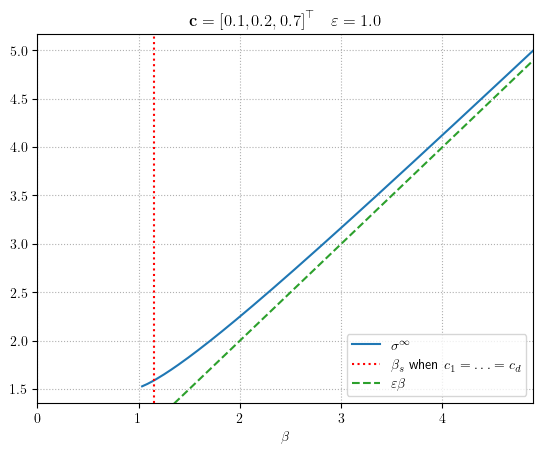

In [5]:
plt.plot(beta_r[i_eps], sigma_r[i_eps], color='C0', label="$\\sigma^\\infty$")
plt.axvline(x=np.sqrt(((d-1)/(eps_r[i_eps]*d))*((d-1)/(d-2))**(d-2)), color='red', ls=':', label="$\\beta_s$ when $c_1 = \\dots = c_d$")
ylim = plt.ylim()
plt.plot(beta_r[i_eps], eps_r[i_eps]*beta_r[i_eps], color='C2', ls='--', label="$\\varepsilon \\beta$")
plt.xlim(0, np.nanmax(beta_r[i_eps]))
plt.ylim(*ylim)
plt.grid(ls=':')
plt.xlabel("$\\beta$")
plt.legend()
plt.title(setting_eps);

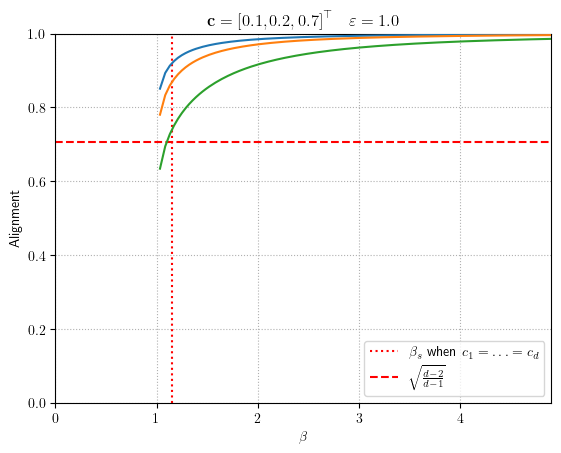

In [6]:
plt.plot(beta_r[i_eps], align_r[i_eps], zorder=3)
plt.axvline(x=np.sqrt(((d-1)/(eps_r[i_eps]*d))*((d-1)/(d-2))**(d-2)), color='red', ls=':', label="$\\beta_s$ when $c_1 = \\dots = c_d$", zorder=2)
plt.axhline(y=np.sqrt((d-2)/(d-1)), ls='--', color='red', label="$\\sqrt{\\frac{d-2}{d-1}}$", zorder=2)
plt.grid(ls=':')
plt.xlim(0, np.nanmax(beta_r[i_eps]))
plt.ylim(0, 1)
plt.xlabel("$\\beta$")
plt.ylabel("Alignment")
plt.legend()
plt.title(setting_eps);

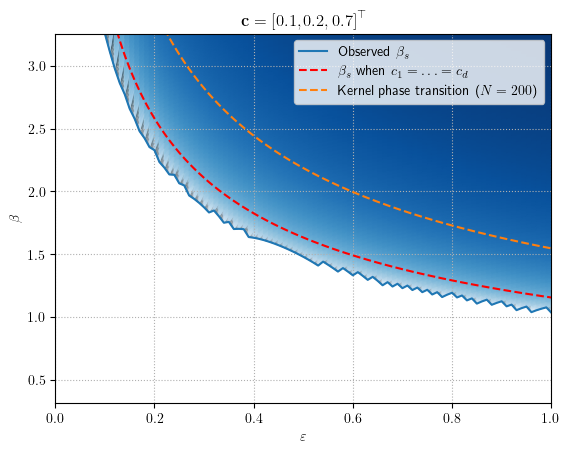

In [7]:
mask_pht = ~np.isnan(beta_pht)
mean_align = np.mean(align_r, axis=-1)[mask_pht]
eps_mesh = np.tile(eps_r[mask_pht, None], (1, beta_r.shape[1]))
beta_mesh = np.where(np.isnan(beta_r[mask_pht].T), beta_pht[mask_pht], beta_r[mask_pht].T).T

beta_pht_max = np.nanmax(beta_pht)
plt.plot(eps_r, beta_pht, color='C0', label="Observed $\\beta_s$")
plt.plot(eps_r, np.sqrt(((d-1)/(eps_r*d))*((d-1)/(d-2))**(d-2)), color='red', ls='--', label="$\\beta_s$ when $c_1 = \\dots = c_d$")
plt.plot(eps_r, kernel_pht, color='C1', ls='--', label="Kernel phase transition ($N = {}$)".format(N))
ymin, ymax = plt.ylim()
plt.pcolormesh(eps_mesh, beta_mesh, mean_align, shading='gouraud', cmap='Blues')
plt.grid(ls=':')
plt.xlim(0, 1)
plt.ylim(ymin, beta_pht_max)
plt.xlabel("$\\varepsilon$")
plt.ylabel("$\\beta$")
plt.legend()
plt.title(setting);

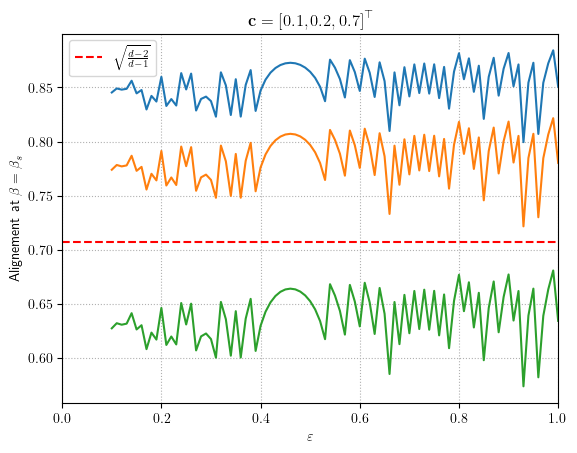

In [8]:
plt.plot(eps_r, align_pht)
plt.axhline(y=np.sqrt((d-2)/(d-1)), ls='--', color='red', label="$\\sqrt{\\frac{d-2}{d-1}}$")
plt.grid(ls=':')
plt.xlim(0, 1)
plt.xlabel("$\\varepsilon$")
plt.ylabel("Alignement at $\\beta = \\beta_s$")
plt.legend()
plt.title(setting);